## Data analysis

In [13]:
import pandas as pd
data_dir = './Beijing/'

In [14]:
def data_analysis(lst_data):
    df_describe = pd.DataFrame(lst_data)
    des = df_describe.describe()
    return des


def feat_analysis(feat, df_feat):
    feat_dir = data_dir + feat +'.csv'
    df = pd.read_csv(feat_dir)
    df.fillna(df.min(axis=1), inplace=True)
    lst_locs = df.keys().tolist()
    lst_locs.remove('date')
    lst_dt = []


    for loc in lst_locs:
        dt = df[loc].tolist()
        lst_dt += dt

    df_feat[feat] = lst_dt
    des = data_analysis(lst_data=lst_dt)
    print(des)

    return df_feat 

In [ ]:
lst_feats = ['AQI', 'CO', 'NO2', 'O3', 'PM2.5', 'PM10', 'SO2']

df_feat= pd.DataFrame()
for feat in lst_feats:
    print('feat: {}'.format(feat))
    feat_analysis(feat,df_feat)


In [17]:
df_feat.fillna( method='ffill', inplace=True)
df_feat.to_csv('feature.csv', index=False)

In [ ]:
pm25 = df_feat['PM25']

In [ ]:
data_dir_meteor = './Beijing2/'
import os

lst_files = os.listdir(data_dir_meteor)

locs = []
for fl in lst_files:
    loc = fl.split('.csv')[0]
    if loc != 'location':
        locs.append(loc)

lst_feats = ['prec','lrad','shum','pres','temp','wind','srad']
data_dct = {
    'prec': [],
    'lrad': [],
    'shum': [],
    'pres': [],
    'temp': [],
    'wind': [],
    'srad': []
}

for loc in locs:
    df_loc = pd.read_csv(data_dir_meteor + loc +'.csv')
    for feat in lst_feats:
        data = df_loc[feat].tolist()
        data_dct[feat] += data 

for feat in lst_feats:
    print('Feat: {}'.format(feat))
    des = data_analysis(data_dct[feat])
    print(des)

## Station distribution

In [23]:
test_1 ={
    'train': [1,2,3,16,17,18,19, 28,29,30,22,23, 11,12,13,14],
    'valid': [27,24,25,26],
    'test': [20,21, 31,32,33,34, 4,5,6,7,8,9,10,15, 0] 
}

In [36]:
import pandas as pd
import numpy as np

loc_dir = './Beijing/location.csv'

df = pd.read_csv(loc_dir)
df.head()
idxs = []
labels = []
for idx in range(df.index[-1]+1):
    if idx in test_1['train']:
        idxs.append('#FF0000')
        labels.append('train set')
    elif idx in test_1['valid']:
        idxs.append('#00FF00')
        labels.append('validation set')
    elif idx in test_1['test']:
        idxs.append('#0000FF')
        labels.append('test set')
df['c'] = idxs
df['label'] = labels

In [25]:
df.to_csv('location_viz_test4.csv')

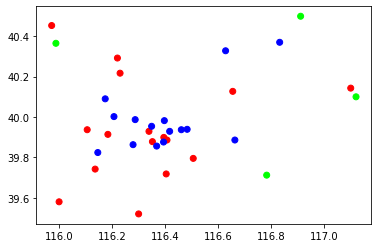

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitude'], y=df['latitude'],c=df['c'])
plt.show()


Correlation btw distance and airquality

In [27]:
# !pip3.7 install geopy
def get_distance( coords1, coords2):
  from geopy import  distance
  return distance.geodesic(tuple(coords1), tuple(coords2)).km

In [37]:
import pandas as pd
import numpy as np 
loc_dir = './Beijing/location.csv'

df = pd.read_csv(loc_dir)
loc_dir = './Beijing/location.csv'
data_dir = './Beijing/PM2.5.csv'
stat_name = [
    '房山',
    '天坛',
    '云岗',
    '东四环',
    '官园',
    '东四',
    '北部新区',
    '丰台花园',
    '东高村',
    '古城',
    '大兴',
    '南三环',
    '前门',
    '榆垡',
    '琉璃河',
    '永乐店',
]
lst_latlon =df[[ 'location','latitude', 'longitude']].to_records(index=False)

lst_latlon_ = []
for loc in lst_latlon:
    if loc[0] in stat_name:
        lst_latlon_.append((loc[1], loc[2]))
print(lst_latlon)

df_data = pd.read_csv(data_dir)
df_data.fillna(0, inplace=True)

lst_corr = {}

for i in range(len(stat_name)):  
    stat_src = stat_name[i]
    loc_stat_src = lst_latlon[i]

    data_src_lst = df_data[stat_src].tolist()
    if stat_src not in lst_corr.keys():
        lst_corr[stat_src] = {}
        lst_corr[stat_src]['dist'] = []
        lst_corr[stat_src]['corr'] = []

    for j in range(len(stat_name)):
        stat_dest = stat_name[j]

        data_dest_lst = df_data[stat_dest].tolist()
        loc_stat_dest = lst_latlon[j]

        dist = get_distance(loc_stat_src, loc_stat_dest)
        corr = np.corrcoef(data_dest_lst,data_src_lst)[0][1]
        lst_corr[stat_src]['dist'].append(dist)
        lst_corr[stat_src]['corr'].append(corr)

# lst_corr

[('东四', 39.929, 116.417) ('天坛', 39.886, 116.407) ('官园', 39.929, 116.339)
 ('万寿西宫', 39.878, 116.352) ('奥体中心', 39.982, 116.397)
 ('农展馆', 39.937, 116.461) ('万柳', 39.987, 116.287)
 ('北部新区', 40.09 , 116.174) ('植物园', 40.002, 116.207)
 ('丰台花园', 39.863, 116.279) ('云岗', 39.824, 116.146) ('古城', 39.914, 116.184)
 ('房山', 39.742, 116.136) ('大兴', 39.718, 116.404) ('亦庄', 39.795, 116.506)
 ('通州', 39.886, 116.663) ('顺义', 40.127, 116.655) ('昌平', 40.217, 116.23 )
 ('门头沟', 39.937, 116.106) ('平谷', 40.143, 117.1  ) ('怀柔', 40.328, 116.628)
 ('密云', 40.37 , 116.832) ('延庆', 40.453, 115.972) ('定陵', 40.292, 116.22 )
 ('八达岭', 40.365, 115.988) ('密云水库', 40.499, 116.911)
 ('东高村', 40.1  , 117.12 ) ('永乐店', 39.712, 116.783) ('榆垡', 39.52 , 116.3  )
 ('琉璃河', 39.58 , 116.   ) ('前门', 39.899, 116.395)
 ('永定门内', 39.876, 116.394) ('西直门北', 39.954, 116.349)
 ('南三环', 39.856, 116.368) ('东四环', 39.939, 116.483)]


ValueError: could not convert string to float: '东四'

In [29]:
lst_corr['东四']['dist']

[0.0,
 4.85038098991623,
 6.667614018211517,
 7.934842369467526,
 6.127918553951432,
 3.8644706872582177,
 12.83980970980855,
 27.38693795136804,
 19.687667473500376,
 13.892225866268005,
 25.949679228348447,
 19.989033905810373,
 31.774984051144536,
 23.45401423051052,
 16.71396280667992,
 21.570224563263547,
 29.93416077551626,
 35.736109627418905,
 26.598250079229807,
 62.949972464527086,
 47.81482301991821,
 60.40034705561427,
 69.43573002953546,
 43.66560528668896,
 60.66316981576032,
 75.98853548626883,
 62.950617000115976,
 39.5277008575916,
 46.50570997522039,
 52.712403109045695,
 3.825405165549021,
 6.204725291693273,
 6.440615634286108,
 9.124712906288506,
 5.749645576111906]

In [30]:
lst_stats = [
    '房山',
    '天坛',
    '云岗',
    '东四环',
    '官园',
    '东四',
    '北部新区',
    '丰台花园',
    '东高村',
    '古城',
    '大兴',
    '南三环',
    '前门',
    '榆垡',
    '琉璃河',
    '永乐店',
]
lst_corr_sorted = {}
for stat in lst_stats:
    corr_lst = lst_corr[stat]['corr']
    dist_lst  = lst_corr[stat]['dist']
    lst_corr_sorted[stat] = [x for _, x in sorted(zip(dist_lst, corr_lst)) ]


In [31]:
import  json
fp = './corr_dict.json'
with open(fp, 'w') as f:
    json.dump( lst_corr_sorted, f, indent=4, ensure_ascii = False)


In [32]:
with open(fp, 'r') as f:
    corr_dict = json.load(f)

In [33]:
df = pd.DataFrame()


for idx, stat in enumerate(lst_stats):
    try:
        df[stat] = corr_dict[stat]
    except:
        pass 

df.fillna(0, inplace=True)
print(df.head())

         房山        天坛        云岗       东四环        官园        东四      北部新区  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.897927  0.951132  0.897927  0.944923  0.937908  0.911888  0.000000   
2  0.838886  0.912982  0.905232  0.932760  0.942123  0.966950  0.902897   
3  0.830440  0.940303  0.871287  0.878461  0.904579  0.952188  0.907128   
4  0.839794  0.962120  0.912211  0.920771  0.950927  0.932760  0.889295   

       丰台花园       东高村        古城        大兴       南三环        前门        榆垡  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.916441  0.890752  0.911998  0.948167  0.948850  0.912982  0.862564   
2  0.891087  0.858308  0.871234  0.937194  0.932452  0.899455  0.776945   
3  0.903255  0.899743  0.000000  0.899174  0.940303  0.911888  0.810830   
4  0.871234  0.728926  0.905232  0.904505  0.897974  0.908050  0.843226   

        琉璃河       永乐店  
0  1.000000  1.000000  
1  0.839794  0.753870  
2  0.776945  0.874403  
3 

In [34]:
df.to_csv('corr_dict_df.csv', index=False)

## Create test data

In [1]:
import os
import numpy as np 
import pandas as pd 

data = './BeijingTest/'
data_src = './Beijing2/'

stats = os.listdir(data_src)
stats_wo_loc = list(set(stats) - set(['location.csv']))

for stat in stats_wo_loc:
    print(data_src + stat)
    df = pd.read_csv(data_src + stat)
    print(df.head())

    df = df.loc[0:100,:]
    df.to_csv(data + stat, index=False)


./Beijing2/大兴.csv
   Unnamed: 0     Change  Unnamed: 0.1  Hour  Day  Month  Year       Mean  \
0           0  91.000000             0     0    1      1  2018  91.000000   
1           1  84.500000             1     1    1      1  2018  84.500000   
2           2  79.666667             2     2    1      1  2018  79.666667   
3           3  76.250000             3     3    1      1  2018  76.250000   
4           4  70.600000             4     4    1      1  2018  70.600000   

   Delta1  Delta3  ...   NO2   O3  SO2  prec      lrad   shum      pres  \
0    91.0    91.0  ...  78.0  2.0  5.0  50.0  735.7500  0.025  268340.0   
1   -13.0    78.0  ...  77.0  2.0  5.0  50.0  735.7500  0.025  268340.0   
2    -8.0    70.0  ...  87.0  2.0  6.0  50.0  735.7500  0.025  268340.0   
3    -4.0   -25.0  ...  83.0  2.0  7.0  50.0  737.9375  0.025  268380.0   
4   -18.0   -30.0  ...  72.0  2.0  6.0  50.0  737.9375  0.025  268380.0   

       temp       wind      srad  
0  275.8283  60.004152  694.5625 